In [86]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
df =pd.read_excel("german_credit_data.xlsx")

In [164]:
df['Risk'] = df['Risk'].replace('good',1)
df['Risk'] = df['Risk'].replace('bad',0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,0
1,45,male,2,free,little,little,7882,42,furniture/equipment,1
2,53,male,2,free,little,little,4870,24,car,0
3,35,male,3,rent,little,moderate,6948,36,car,1
4,28,male,3,own,little,moderate,5234,30,car,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 40.9+ KB


In [166]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [167]:
df.describe()

,Age,Job,Credit amount,Duration,Risk
count,522.000000,522.000000,522.000000,522.000000,522.000000
mean,34.888889,1.875479,3278.745211,21.339080,0.557471
std,11.787918,0.682811,2929.155177,12.474079,0.497163
min,19.000000,0.000000,276.000000,6.000000,0.000000
25%,26.000000,2.000000,1297.500000,12.000000,0.000000
50%,31.500000,2.000000,2326.500000,18.000000,1.000000
75%,41.000000,2.000000,3971.250000,26.750000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


In [168]:
df['Housing'] = df['Housing'].map({"own":0,"free":1,"rent":2}).astype(float);
df['Purpose'] = df['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);

In [169]:
df.shape

(522, 10)

In [170]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,0.0,little,moderate,5951,48,0.0,0
1,45,male,2,1.0,little,little,7882,42,2.0,1
2,53,male,2,1.0,little,little,4870,24,3.0,0
3,35,male,3,2.0,little,moderate,6948,36,3.0,1
4,28,male,3,0.0,little,moderate,5234,30,3.0,0


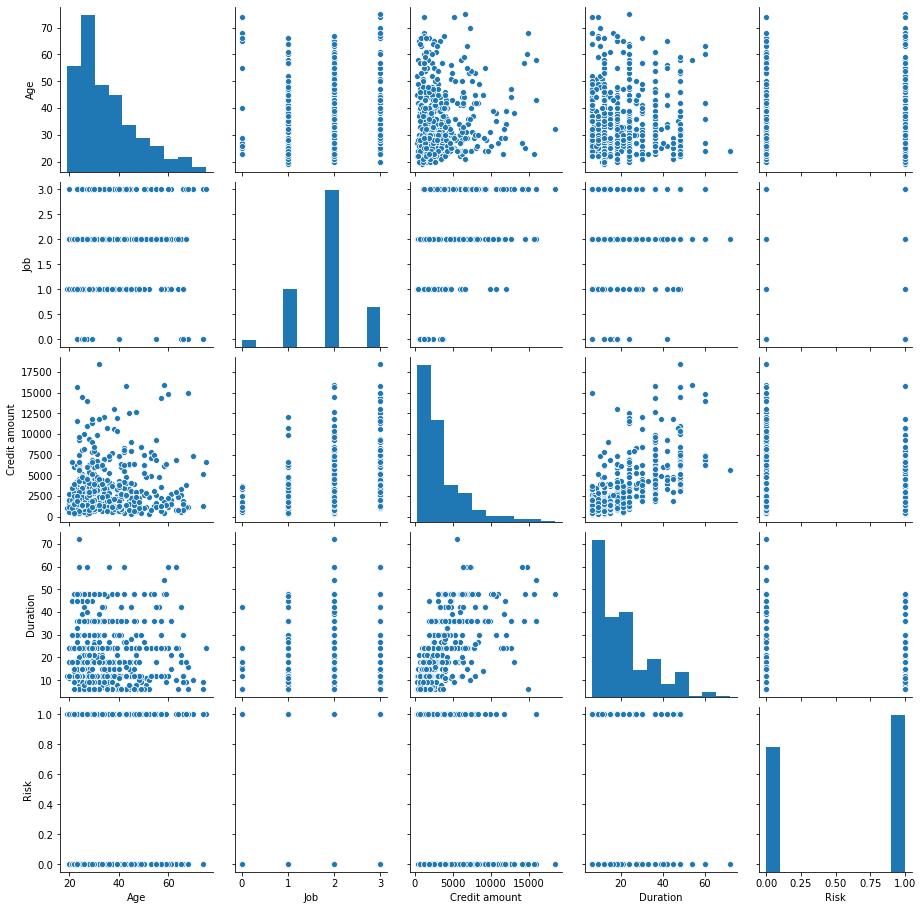

In [113]:
sns.pairplot(df)

In [171]:
df['Credit amount'] = np.log(df['Credit amount'])

In [172]:
df.describe()

,Age,Job,Housing,Credit amount,Duration,Purpose,Risk
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,34.888889,1.875479,0.538314,7.771222,21.339080,2.203065,0.557471
std,11.787918,0.682811,0.814614,0.804949,12.474079,1.652355,0.497163
min,19.000000,0.000000,0.000000,5.620401,6.000000,0.000000,0.000000
25%,26.000000,2.000000,0.000000,7.168194,12.000000,0.000000,0.000000
50%,31.500000,2.000000,0.000000,7.752120,18.000000,2.000000,1.000000
75%,41.000000,2.000000,1.000000,8.286836,26.750000,3.000000,1.000000
max,75.000000,3.000000,2.000000,9.821409,72.000000,7.000000,1.000000


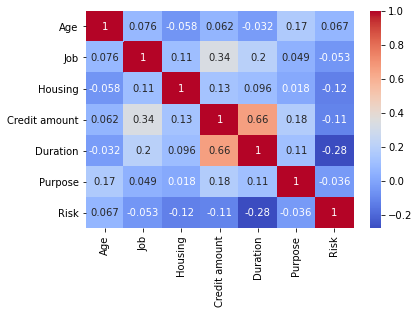

In [173]:
sns.heatmap(df.corr(method='spearman'), annot = True,cmap= 'coolwarm')

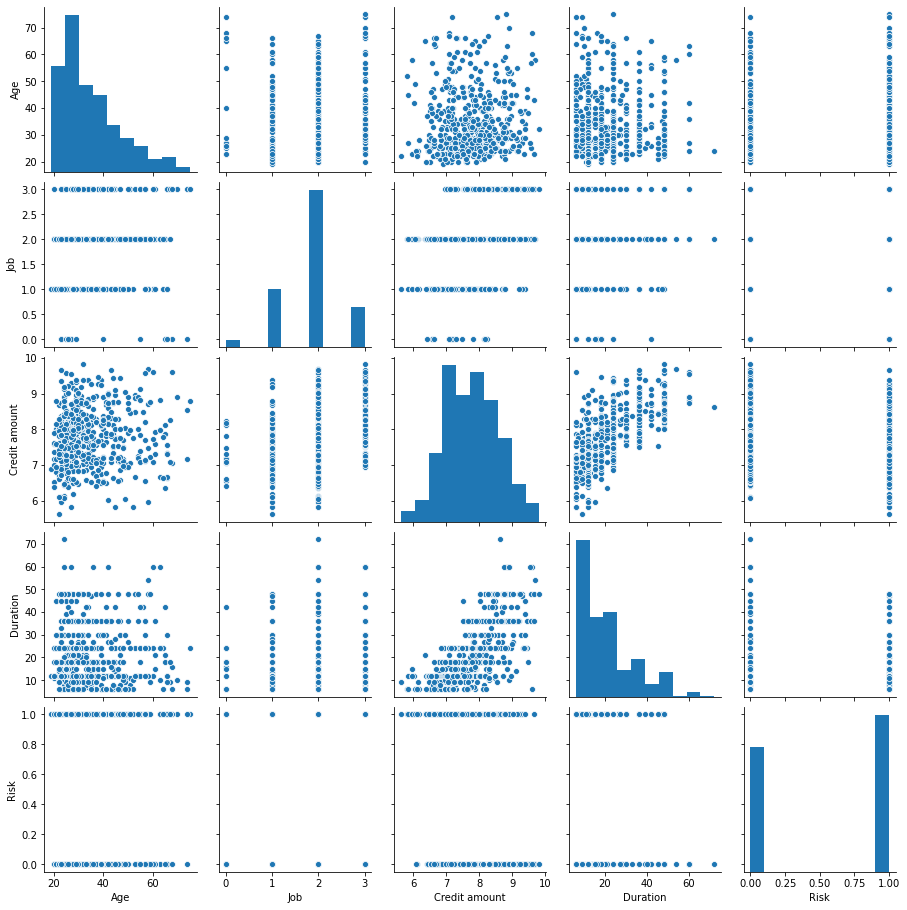

In [134]:
sns.pairplot(df)

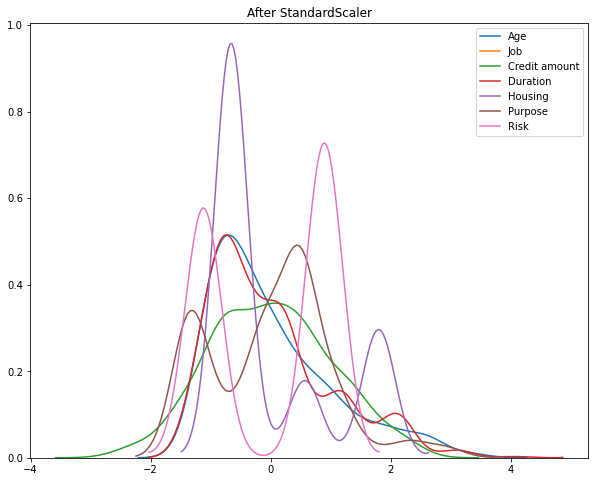

In [176]:
from sklearn.preprocessing import StandardScaler
col_names = list(df1.columns)
df1=df[["Age", "Job","Credit amount","Duration","Housing","Purpose","Risk"]]
scaler1 = StandardScaler()
df_m = scaler1.fit_transform(df1)
df_m = pd.DataFrame(df_m, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_m['Age'], ax=ax1)
sns.kdeplot(df_m['Job'], ax=ax1)
sns.kdeplot(df_m['Credit amount'], ax=ax1)
sns.kdeplot(df_m['Duration'], ax=ax1)
sns.kdeplot(df_m['Housing'], ax=ax1)
sns.kdeplot(df_m['Purpose'], ax=ax1)
sns.kdeplot(df_m['Risk'], ax=ax1)

In [177]:
print(df['Risk'])

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64


In [193]:
X = df1.drop('Risk',axis = 1)
y = df1['Risk']

In [194]:
from sklearn.cluster import KMeans
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

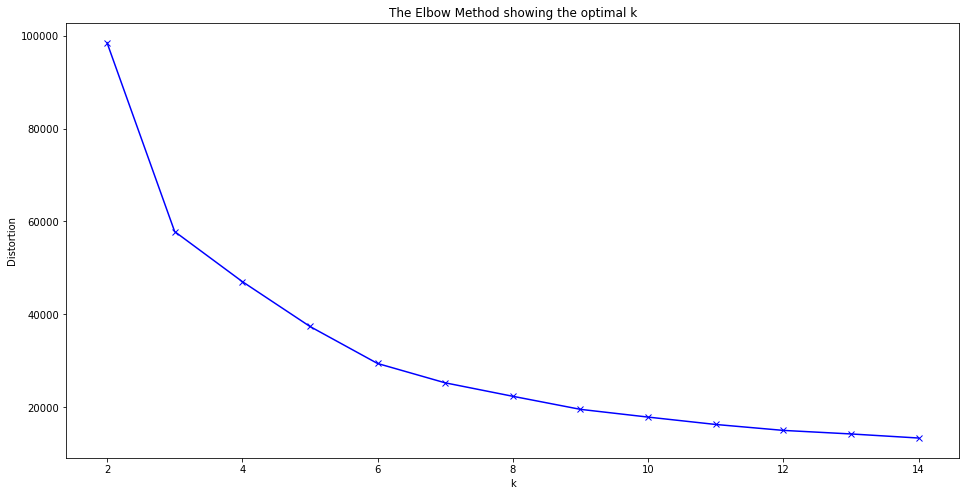

In [195]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [196]:
from sklearn.decomposition import PCA

In [218]:
n=4
pca = PCA(4)
data = pca.fit_transform(df1)

In [219]:
for i in range(1,n+1):
    print("The total variance explained by the first {} principle component{} is {}.".format(
            i,
            " " if i == 1 else "s",
            sum(pca.explained_variance_ratio_[0:i])
    ))

The total variance explained by the first 1 principle component  is 0.5210757095965153.
The total variance explained by the first 2 principle components is 0.9855254740862313.
The total variance explained by the first 3 principle components is 0.9943651181635227.
The total variance explained by the first 4 principle components is 0.9966275042495626.


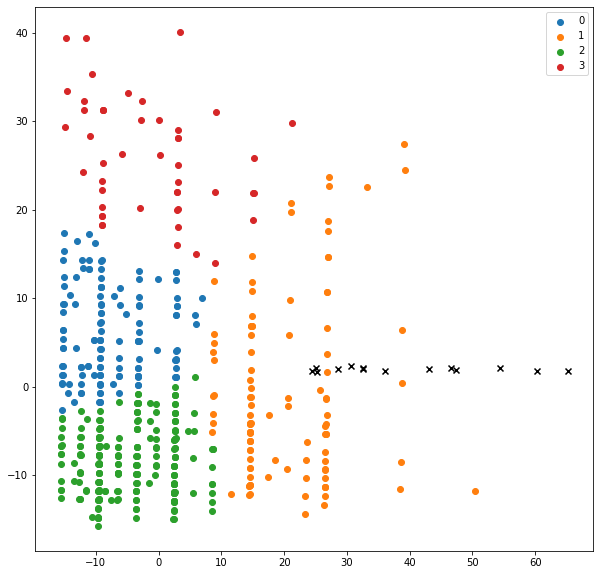

In [220]:
centers = np.array(kmeanModel.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()

In [211]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [212]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


In [213]:
import xgboost as xgb
import xgboost as cv

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [215]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[19:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [216]:
y_pred = xgb_clf.predict(X_test)

In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        62
           1       0.70      0.75      0.72        95

    accuracy                           0.65       157
   macro avg       0.63      0.62      0.63       157
weighted avg       0.64      0.65      0.65       157

